In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
data=df.drop(columns=["User ID"],axis=1)

In [7]:
data.groupby(['Gender','Purchased']).describe().T

Gender                        Female                          Male  \
Purchased                          0              1              0   
Age             count     127.000000      77.000000     130.000000   
                mean       33.110236      47.155844      32.484615   
                std         8.468643       8.463645       7.504246   
                min        18.000000      27.000000      18.000000   
                25%        27.000000      42.000000      26.000000   
                50%        33.000000      48.000000      34.500000   
                75%        39.000000      53.000000      38.000000   
                max        59.000000      60.000000      49.000000   
EstimatedSalary count     127.000000      77.000000     130.000000   
                mean    61480.314961   88714.285714   59630.769231   
                std     25248.243816   43123.097103   23504.292355   
                min     15000.000000   20000.000000   15000.000000   
                25%     44000.000000   41000.000000   43500.000000   
                50%     62000.000000   96000.000000   60500.000000   
                75%     79000.000000  130000.000000   76750.000000   
                max    134000.000000  150000.000000  141000.000000   

Gender                                
Purchased                          1  
Age             count      66.000000  
                mean       45.500000  
                std         8.762244  
                min        28.000000  
                25%        39.000000  
                50%        46.000000  
                75%        50.500000  
                max        60.000000  
EstimatedSalary count      66.000000  
                mean    83424.242424  
                std     40937.122745  
                min     20000.000000  
                25%     41250.000000  
                50%     87500.000000  
                75%    117750.000000  
                max    150000.000000

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])

In [9]:
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


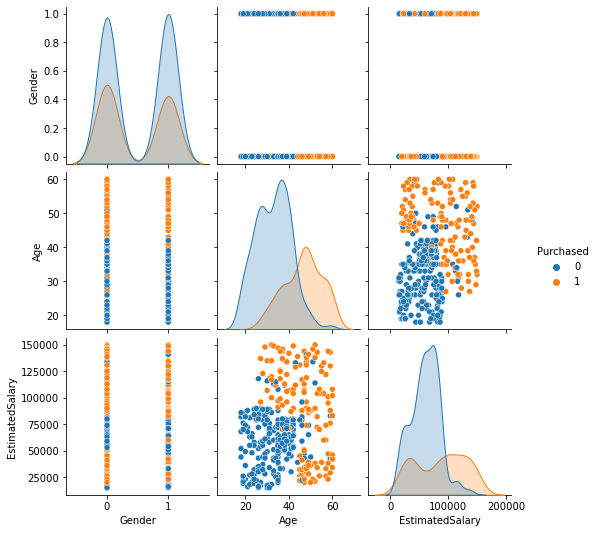

In [10]:
sns.pairplot(data,hue='Purchased')

<AxesSubplot:ylabel='Density'>

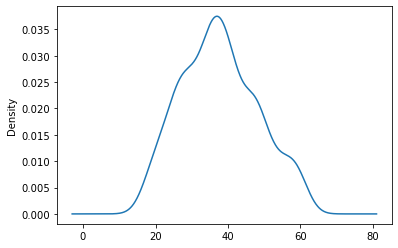

In [11]:
data["Age"].plot.kde()

<AxesSubplot:>

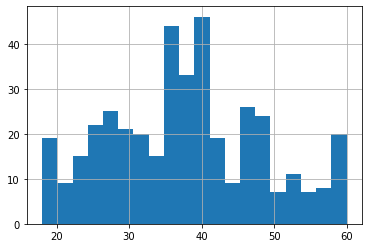

In [12]:
data["Age"].hist(bins=20)

(array([22., 18.,  5.,  5., 12., 17., 16., 13., 14., 21.]),
 array([ 20000.,  33000.,  46000.,  59000.,  72000.,  85000.,  98000.,
        111000., 124000., 137000., 150000.]),
 <BarContainer object of 10 artists>)

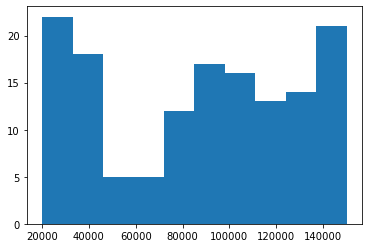

In [13]:
plt.hist(data[data["Purchased"]==1]["EstimatedSalary"])

(array([32., 20., 37., 57., 47., 52.,  1.,  5.,  3.,  3.]),
 array([ 15000.,  27600.,  40200.,  52800.,  65400.,  78000.,  90600.,
        103200., 115800., 128400., 141000.]),
 <BarContainer object of 10 artists>)

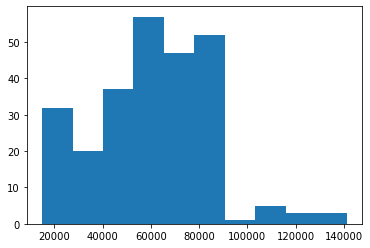

In [14]:
plt.hist(data[data["Purchased"]==0]["EstimatedSalary"])

In [15]:
X=data.drop(columns=["Purchased"])

In [16]:
Y=data["Purchased"]

In [17]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [18]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=10)

In [20]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()

In [21]:
DTC.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [22]:
DTC.score(xtest,ytest)

0.91

In [23]:
from sklearn.ensemble import RandomForestClassifier
RC=RandomForestClassifier().fit(xtrain,ytrain)
RC.score(xtest,ytest)

0.92

In [47]:
ypred=DTC.predict(xtrain)

In [48]:
from sklearn.metrics import confusion_matrix


array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], d

In [24]:
DTC.feature_importances_

array([0.03168947, 0.5109603 , 0.45735023])

In [25]:
X.columns

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [26]:
dt_df=pd.DataFrame(DTC.feature_importances_,index=X.columns,columns=["Features_imp"])

In [27]:
dt_df*100

,Features_imp
Gender,3.168947
Age,51.096030
EstimatedSalary,45.735023


In [28]:
RC.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [29]:
RC.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1677257281),
 DecisionTreeClassifier(max_features='auto', random_state=68443900),
 DecisionTreeClassifier(max_features='auto', random_state=1970765172),
 DecisionTreeClassifier(max_features='auto', random_state=50730043),
 DecisionTreeClassifier(max_features='auto', random_state=1631932000),
 DecisionTreeClassifier(max_features='auto', random_state=92749245),
 DecisionTreeClassifier(max_features='auto', random_state=519329657),
 DecisionTreeClassifier(max_features='auto', random_state=423690358),
 DecisionTreeClassifier(max_features='auto', random_state=1168545596),
 DecisionTreeClassifier(max_features='auto', random_state=629717186),
 DecisionTreeClassifier(max_features='auto', random_state=1267398071),
 DecisionTreeClassifier(max_features='auto', random_state=261640405),
 DecisionTreeClassifier(max_features='auto', random_state=1066273125),
 DecisionTreeClassifier(max_features='auto', random_state=824894389),
 DecisionTreeClas

In [30]:
RC.feature_importances_ *100

array([ 1.0626583 , 52.88204224, 46.05529946])

In [31]:
model_DT=DecisionTreeClassifier(criterion="entropy",random_state=100).fit(xtrain,ytrain)

In [32]:
model_DT.score(xtest,ytest)

0.87

In [33]:
scores=[]
for i in range(5,201,5):
    model_RF=RandomForestClassifier(n_estimators=i).fit(xtrain,ytrain)
    scores.append(model_RF.score(xtest,ytest)*100)

In [34]:
scores

[90.0,
 94.0,
 92.0,
 92.0,
 93.0,
 93.0,
 92.0,
 92.0,
 93.0,
 93.0,
 93.0,
 92.0,
 92.0,
 92.0,
 93.0,
 92.0,
 92.0,
 93.0,
 93.0,
 92.0,
 92.0,
 93.0,
 93.0,
 92.0,
 92.0,
 93.0,
 93.0,
 93.0,
 93.0,
 93.0,
 92.0,
 93.0,
 92.0,
 92.0,
 92.0,
 93.0,
 93.0,
 93.0,
 93.0,
 93.0]

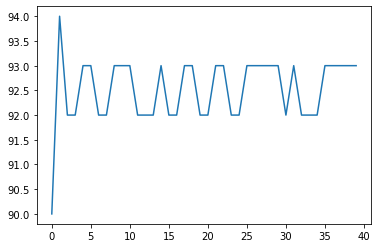

In [35]:
plt.plot(scores)

In [36]:
criterions=['gini','entropy']
n_est=list(range(5,201,5))
min_splits=[2,4,6,8,10,12,14,16,18,20]
params={'n_estimators':n_est,'criterion':criterions,'min_samples_split':min_splits}

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
g_mod=GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=3)


In [39]:
g_mod.fit(xtrain,ytrain)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV 1/5] END criterion=gini, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=2, n_estimators=15; total time=   

[CV 3/5] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=2, n_estimators=105; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=2, n_estimators=105; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=2, n_estimators=105; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=2, n_estimators=105; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=2, n_estimators=105; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_sp

[CV 4/5] END criterion=gini, min_samples_split=2, n_estimators=195; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=2, n_estimators=195; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=4, n

[CV 1/5] END criterion=gini, min_samples_split=4, n_estimators=95; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=4, n_estimators=95; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=4, n_estimators=95; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=4, n_estimators=95; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=4, n_estimators=95; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=4, n_estimators=105; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=4

[CV 1/5] END criterion=gini, min_samples_split=4, n_estimators=190; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_split=4, n_estimators=190; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=4, n_estimators=190; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=4, n_estimators=190; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=4, n_estimators=190; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=4, n_estimators=195; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_split=4, n_estimators=195; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=4, n_estimators=195; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=4, n_estimators=195; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=4, n_estimators=195; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_sp

[CV 4/5] END criterion=gini, min_samples_split=6, n_estimators=85; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=6, n_estimators=85; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=6, n_es

[CV 5/5] END criterion=gini, min_samples_split=6, n_estimators=180; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=6, n_estimators=185; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_split=6, n_estimators=185; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=6, n_estimators=185; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=6, n_estimators=185; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=6, n_estimators=185; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=6, n_estimators=190; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_split=6, n_estimators=190; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=6, n_estimators=190; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=6, n_estimators=190; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=6, n_estimators=190; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_sp

[CV 2/5] END criterion=gini, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=8, n_estimators=85; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=8, n_estimators=85; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=8, n_estimators=85; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=8, n_estimators=85; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=8, n_estimators=85; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=8, n_es

[CV 2/5] END criterion=gini, min_samples_split=8, n_estimators=175; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=8, n_estimators=175; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=8, n_estimators=175; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=8, n_estimators=175; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=8, n_estimators=180; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_split=8, n_estimators=180; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=8, n_estimators=180; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=8, n_estimators=180; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=8, n_estimators=180; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=8, n_estimators=185; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_split=8, n_estimators=185; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_sp

[CV 3/5] END criterion=gini, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=10, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=10, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=10, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=10, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=10, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=10, n_estimators=80; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=10, n_estimators=80; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=10, n_estimators=80; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_sp

[CV 3/5] END criterion=gini, min_samples_split=10, n_estimators=165; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=10, n_estimators=165; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=10, n_estimators=165; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=10, n_estimators=170; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_split=10, n_estimators=170; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=10, n_estimators=170; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=10, n_estimators=170; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=10, n_estimators=170; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=10, n_estimators=175; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_split=10, n_estimators=175; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=10, n_estimators=175; total time=   0.1s
[CV 4/5] END criterion=gini, min

[CV 5/5] END criterion=gini, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=12, n_estimators=65; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=12, n_estimators=65; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=12, n_estimators=65; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=12, n_estimators=65; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=12, n_estimators=65; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_sp

[CV 5/5] END criterion=gini, min_samples_split=12, n_estimators=155; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=12, n_estimators=160; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=12, n_estimators=160; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=12, n_estimators=160; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=12, n_estimators=160; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=12, n_estimators=160; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=12, n_estimators=165; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_split=12, n_estimators=165; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=12, n_estimators=165; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=12, n_estimators=165; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=12, n_estimators=165; total time=   0.1s
[CV 1/5] END criterion=gini, min

[CV 2/5] END criterion=gini, min_samples_split=14, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=14, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=14, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=14, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=14, n_estimators=65; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=14, n_estimators=65; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_sp

[CV 1/5] END criterion=gini, min_samples_split=14, n_estimators=150; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_split=14, n_estimators=150; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=14, n_estimators=150; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=14, n_estimators=150; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=14, n_estimators=150; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=14, n_estimators=155; total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_split=14, n_estimators=155; total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_split=14, n_estimators=155; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=14, n_estimators=155; total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_split=14, n_estimators=155; total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_split=14, n_estimators=160; total time=   0.1s
[CV 2/5] END criterion=gini, min

[CV 2/5] END criterion=gini, min_samples_split=16, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=16, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=16, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=16, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=16, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=16, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_sp

[CV 2/5] END criterion=gini, min_samples_split=16, n_estimators=140; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=16, n_estimators=140; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=16, n_estimators=140; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=16, n_estimators=140; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=16, n_estimators=145; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=16, n_estimators=145; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=16, n_estimators=145; total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_split=16, n_estimators=145; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=16, n_estimators=145; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=16, n_estimators=150; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=16, n_estimators=150; total time=   0.1s
[CV 3/5] END criterion=gini, min

[CV 1/5] END criterion=gini, min_samples_split=18, n_estimators=35; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=18, n_estimators=35; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=18, n_estimators=35; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=18, n_estimators=35; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=18, n_estimators=35; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=18, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=18, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=18, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=18, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=18, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=18, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_sp

[CV 5/5] END criterion=gini, min_samples_split=18, n_estimators=125; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=18, n_estimators=130; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=18, n_estimators=130; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=18, n_estimators=130; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=18, n_estimators=130; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=18, n_estimators=130; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=18, n_estimators=135; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=18, n_estimators=135; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=18, n_estimators=135; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=18, n_estimators=135; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=18, n_estimators=135; total time=   0.0s
[CV 1/5] END criterion=gini, min

[CV 5/5] END criterion=gini, min_samples_split=20, n_estimators=25; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=20, n_estimators=30; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=20, n_estimators=30; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=20, n_estimators=30; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=20, n_estimators=30; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=20, n_estimators=30; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=20, n_estimators=35; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=20, n_estimators=35; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=20, n_estimators=35; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=20, n_estimators=35; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=20, n_estimators=35; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_sp

[CV 4/5] END criterion=gini, min_samples_split=20, n_estimators=120; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=20, n_estimators=120; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=20, n_estimators=125; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=20, n_estimators=125; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=20, n_estimators=125; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=20, n_estimators=125; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=20, n_estimators=125; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=20, n_estimators=130; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=20, n_estimators=130; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=20, n_estimators=130; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=20, n_estimators=130; total time=   0.0s
[CV 5/5] END criterion=gini, min

[CV 5/5] END criterion=entropy, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV 1/5] END criterio

[CV 3/5] END criterion=entropy, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=2, n_estimators=115; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=2, n_estimators=115; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=2, n_estimators=115; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=2, n_estimators=115; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=2, n_estimators=115; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV 4/5] E

[CV 1/5] END criterion=entropy, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV 2/5] END criterion=ent

[CV 5/5] END criterion=entropy, min_samples_split=4, n_estimators=95; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=4, n_estimators=105; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=4, n_estimators=105; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=4, n_estimators=105; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=4, n_estimators=105; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=4, n_estimators=105; total time=   0.0s
[CV 1/5] EN

[CV 2/5] END criterion=entropy, min_samples_split=4, n_estimators=190; total time=   0.1s
[CV 3/5] END criterion=entropy, min_samples_split=4, n_estimators=190; total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_split=4, n_estimators=190; total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_split=4, n_estimators=190; total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_split=4, n_estimators=195; total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_split=4, n_estimators=195; total time=   0.1s
[CV 3/5] END criterion=entropy, min_samples_split=4, n_estimators=195; total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_split=4, n_estimators=195; total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_split=4, n_estimators=195; total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV 3/5] E

[CV 4/5] END criterion=entropy, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=6, n_estimators=85; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=6, n_estimators=85; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=6, n_estimators=85; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=6, n_estimators=85; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=6, n_estimators=85; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV 5/5] END criterio

[CV 1/5] END criterion=entropy, min_samples_split=6, n_estimators=175; total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_split=6, n_estimators=175; total time=   0.1s
[CV 3/5] END criterion=entropy, min_samples_split=6, n_estimators=175; total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_split=6, n_estimators=175; total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_split=6, n_estimators=175; total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_split=6, n_estimators=180; total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_split=6, n_estimators=180; total time=   0.1s
[CV 3/5] END criterion=entropy, min_samples_split=6, n_estimators=180; total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_split=6, n_estimators=180; total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_split=6, n_estimators=180; total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_split=6, n_estimators=185; total time=   0.1s
[CV 2/5] E

[CV 1/5] END criterion=entropy, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=8, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=8, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=8, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=8, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=8, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 2/5] END criterio

[CV 4/5] END criterion=entropy, min_samples_split=8, n_estimators=160; total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_split=8, n_estimators=160; total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_split=8, n_estimators=165; total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_split=8, n_estimators=165; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=8, n_estimators=165; total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_split=8, n_estimators=165; total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_split=8, n_estimators=165; total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_split=8, n_estimators=170; total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_split=8, n_estimators=170; total time=   0.1s
[CV 3/5] END criterion=entropy, min_samples_split=8, n_estimators=170; total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_split=8, n_estimators=170; total time=   0.1s
[CV 5/5] E

[CV 2/5] END criterion=entropy, min_samples_split=10, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=10, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=10, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=10, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=10, n_estimators=65; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=10, n_estimators=65; total time=   0.0s
[CV 3/5] E

[CV 4/5] END criterion=entropy, min_samples_split=10, n_estimators=145; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=10, n_estimators=145; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=10, n_estimators=155; total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_split=10, n_estimators=155; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=10, n_estimators=155; total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_split=10, n_estimators=155; total time=   0.0s

[CV 1/5] END criterion=entropy, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=12, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=12, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=12, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=12, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=12, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV 2/5] E

[CV 2/5] END criterion=entropy, min_samples_split=12, n_estimators=130; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=12, n_estimators=130; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=12, n_estimators=130; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=12, n_estimators=130; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=12, n_estimators=135; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=12, n_estimators=135; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=12, n_estimators=135; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=12, n_estimators=135; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=12, n_estimators=135; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=12, n_estimators=140; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=12, n_estimators=140; total time=   0.0s

[CV 1/5] END criterion=entropy, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=14, n_estimators=35; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=14, n_estimators=35; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=14, n_estimators=35; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=14, n_estimators=35; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=14, n_estimators=35; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=14, n_estimators=40; total time=   0.0s
[CV 2/5] E

[CV 2/5] END criterion=entropy, min_samples_split=14, n_estimators=120; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=14, n_estimators=120; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=14, n_estimators=120; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=14, n_estimators=120; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=14, n_estimators=125; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=14, n_estimators=125; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=14, n_estimators=125; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=14, n_estimators=125; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=14, n_estimators=125; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=14, n_estimators=130; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=14, n_estimators=130; total time=   0.0s

[CV 1/5] END criterion=entropy, min_samples_split=16, n_estimators=20; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=16, n_estimators=20; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=16, n_estimators=20; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=16, n_estimators=20; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=16, n_estimators=20; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=16, n_estimators=25; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=16, n_estimators=25; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=16, n_estimators=25; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=16, n_estimators=25; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=16, n_estimators=25; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV 2/5] E

[CV 2/5] END criterion=entropy, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=16, n_estimators=115; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=16, n_estimators=115; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=16, n_estimators=115; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=16, n_estimators=115; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=16, n_estimators=115; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=16, n_estimators=120; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=16, n_estimators=120; total time=   0.0s

[CV 4/5] END criterion=entropy, min_samples_split=16, n_estimators=200; total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_split=16, n_estimators=200; total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_split=18, n_estimators=5; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=18, n_estimators=5; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=18, n_estimators=5; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=18, n_estimators=5; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=18, n_estimators=5; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV 5/5] END 

[CV 1/5] END criterion=entropy, min_samples_split=18, n_estimators=95; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=18, n_estimators=95; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=18, n_estimators=95; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=18, n_estimators=95; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=18, n_estimators=95; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=18, n_estimators=105; total time=   0.1s
[CV 

[CV 3/5] END criterion=entropy, min_samples_split=18, n_estimators=185; total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_split=18, n_estimators=185; total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_split=18, n_estimators=185; total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_split=18, n_estimators=190; total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_split=18, n_estimators=190; total time=   0.1s
[CV 3/5] END criterion=entropy, min_samples_split=18, n_estimators=190; total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_split=18, n_estimators=190; total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_split=18, n_estimators=190; total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_split=18, n_estimators=195; total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_split=18, n_estimators=195; total time=   0.1s
[CV 3/5] END criterion=entropy, min_samples_split=18, n_estimators=195; total time=   0.1s

[CV 5/5] END criterion=entropy, min_samples_split=20, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=20, n_estimators=80; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=20, n_estimators=80; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=20, n_estimators=80; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=20, n_estimators=80; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=20, n_estimators=80; total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=20, n_estimators=85; total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=20, n_estimators=85; total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=20, n_estimators=85; total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=20, n_estimators=85; total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=20, n_estimators=85; total time=   0.0s
[CV 1/5] E

[CV 2/5] END criterion=entropy, min_samples_split=20, n_estimators=170; total time=   0.1s
[CV 3/5] END criterion=entropy, min_samples_split=20, n_estimators=170; total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_split=20, n_estimators=170; total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_split=20, n_estimators=170; total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_split=20, n_estimators=175; total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_split=20, n_estimators=175; total time=   0.1s
[CV 3/5] END criterion=entropy, min_samples_split=20, n_estimators=175; total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_split=20, n_estimators=175; total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_split=20, n_estimators=175; total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_split=20, n_estimators=180; total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_split=20, n_estimators=180; total time=   0.1s

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145, 150, ...]},
             verbose=3)

In [40]:
g_mod.best_score_

0.9166666666666666

In [46]:
print(g_mod.best_estimator_)
print(g_mod.best_index_)
print(g_mod.best_params_)

RandomForestClassifier(min_samples_split=14, n_estimators=140)
267
{'criterion': 'gini', 'min_samples_split': 14, 'n_estimators': 140}
